In [ ]:
import heapq as hq
import numpy as np
import graphviz as gv
import math

In [ ]:
def drawG_al(G, directed=False, weighted=False, path=[], layout="sfdp"):
  graph = gv.Digraph("directed") if directed else gv.Graph("undirected")
  graph.graph_attr["layout"] = layout
  graph.edge_attr["color"] = "gray"
  graph.node_attr["color"] = "orangered"
  graph.node_attr["width"] = "0.1"
  graph.node_attr["height"] = "0.1"
  graph.node_attr["fontsize"] = "8"
  graph.node_attr["fontcolor"] = "mediumslateblue"
  graph.node_attr["fontname"] = "monospace"
  graph.edge_attr["fontsize"] = "8"
  graph.edge_attr["fontname"] = "monospace"
  n = len(G)
  added = set()
  for v, u in enumerate(path):
    if u != -1:
      if weighted:
        for vi, w in G[u]:
          if vi == v:
            break
        graph.edge(str(u), str(v), str(w), dir="forward", penwidth="2", color="orange")
      else:
        graph.edge(str(u), str(v), dir="forward", penwidth="2", color="orange")
      added.add(f"{u},{v}")
      added.add(f"{v},{u}")
  for u in range(n):
    for v, w in G[u]:
      draw = False
      if not directed and not f"{u},{v}" in added:  
        added.add(f"{u},{v}")
        added.add(f"{v},{u}")
        draw = True
      elif directed:
        draw = True
      if draw:
        if weighted:
          graph.edge(str(u), str(v), str(w))
        else:
          graph.edge(str(u), str(v))
  return graph

In [ ]:
callesH = 5
callesV = 4
ids = []
cont = 0

def getCuadras(callesH, callesV):
  cuadras = (callesH - 1) * callesV + (callesV - 1) * callesH
  return cuadras

for i in range(callesH):
    tmp = []
    aux = []
    for j in range(callesV):
        tmp.append(cont)
        cont += 1
    ids.append(tmp)
matriz = []
cont = 0
for i in range(len(ids)):
    for j in range(len(ids[i])):
        vecinos = []
        id = ids[i][j]
        if id - callesV >= 0:
            vecinos.append((id - callesV, 10))
        if id + callesV < ids[callesH - 1][callesV - 1]:
            vecinos.append((id + callesV, 10))
        if id % callesV != 0 and (id + 1) % callesV != 0 or (id + 1) % callesV != 0 and id % callesV != 0:
            vecinos.append((id - 1, 20))
            vecinos.append((id + 1, 20))
        else:
            if id % callesV == 0:
                vecinos.append((id + 1, 20))
            elif (id + 1) % callesV == 0:
                vecinos.append((id - 1, 20))
        vecinos.sort()
        matriz.append(vecinos)
adyacencia = []
for i in matriz:
    aux = []
    for j in range(callesV * callesH):
        if j in i:
            aux.append(0)
        else: aux.append(10)
    adyacencia.append(aux)

with open('grafoPrueba.al', mode='w') as file:
  for i in matriz:
    for j in i:
      file.write(str(str(j[0]) + ' ' + str(j[1]) + ' '))
    file.write('\n')



In [ ]:
for i in ids:
  print(i)

[0, 1, 2, 3]
[4, 5, 6, 7]
[8, 9, 10, 11]
[12, 13, 14, 15]
[16, 17, 18, 19]


In [ ]:
G = []
with open("grafoPrueba.al") as f:
  for line in f:
    nums = [int(x) for x in line.split()]
    G.append([])
    for i in range(0, len(nums), 2):
      G[-1].append((nums[i], nums[i+1]))

for x in G:
  print(x)

[(1, 20), (4, 10)]
[(0, 20), (2, 20), (5, 10)]
[(1, 20), (3, 20), (6, 10)]
[(2, 20), (7, 10)]
[(0, 10), (5, 20), (8, 10)]
[(1, 10), (4, 20), (6, 20), (9, 10)]
[(2, 10), (5, 20), (7, 20), (10, 10)]
[(3, 10), (6, 20), (11, 10)]
[(4, 10), (9, 20), (12, 10)]
[(5, 10), (8, 20), (10, 20), (13, 10)]
[(6, 10), (9, 20), (11, 20), (14, 10)]
[(7, 10), (10, 20), (15, 10)]
[(8, 10), (13, 20), (16, 10)]
[(9, 10), (12, 20), (14, 20), (17, 10)]
[(10, 10), (13, 20), (15, 20), (18, 10)]
[(11, 10), (14, 20)]
[(12, 10), (17, 20)]
[(13, 10), (16, 20), (18, 20)]
[(14, 10), (17, 20), (19, 20)]
[(15, 10), (18, 20)]


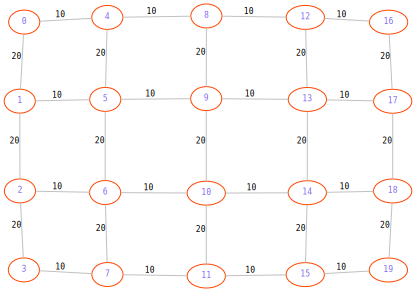

In [ ]:
drawG_al(matriz, weighted=True)

In [ ]:
calles = {}#Diccionario donde se el nombre de la calle y su respectivo valor
for i in range(callesH + callesV):
  calles[str('CALLE' + str(i + 1))] = i + 1
print(calles)

{'CALLE1': 1, 'CALLE2': 2, 'CALLE3': 3, 'CALLE4': 4, 'CALLE5': 5, 'CALLE6': 6, 'CALLE7': 7, 'CALLE8': 8, 'CALLE9': 9}


In [ ]:
def getID(calle1, calle2):#Funcion para obtener las calles de interseccion con solo tener el id
  if calle1 not in calles:
    return -1#No existe calle1
  if calle2 not in calles:
    return -2#No existe calle2
  c1 = calles[calle1]
  c2 = calles[calle2]
  if c2 > callesH and c1 <= callesH or c1 > callesH and c2 <= callesH:
    if c1 < c2:
      id = callesV * (c1 - 1) + (c2 - callesH)
    else:
      id = callesV * (c2 - 1) + (c1 - callesH)
    return id - 1
  else:
    return -3#No existe interseccion entre ambas calles

nombres = list(calles.keys())

for i in range(len(nombres) - 1):
  for j in range(i, len(nombres)):
    id = getID(nombres[i],nombres[j])
    print(nombres[i], 'con', nombres[j],': ', id) if id >= 0 else None

CALLE1 con CALLE6 :  0
CALLE1 con CALLE7 :  1
CALLE1 con CALLE8 :  2
CALLE1 con CALLE9 :  3
CALLE2 con CALLE6 :  4
CALLE2 con CALLE7 :  5
CALLE2 con CALLE8 :  6
CALLE2 con CALLE9 :  7
CALLE3 con CALLE6 :  8
CALLE3 con CALLE7 :  9
CALLE3 con CALLE8 :  10
CALLE3 con CALLE9 :  11
CALLE4 con CALLE6 :  12
CALLE4 con CALLE7 :  13
CALLE4 con CALLE8 :  14
CALLE4 con CALLE9 :  15
CALLE5 con CALLE6 :  16
CALLE5 con CALLE7 :  17
CALLE5 con CALLE8 :  18
CALLE5 con CALLE9 :  19


In [ ]:
class Punto:#Obejtos que almacena las coordenadas y las calles de cada interseccion
  def __init__(self, id, x, y, calle1, calle2):
    self._id = id
    self._x = x
    self._y = y
    self._calle1 = calle1
    self._calle2 = calle2
  def getId(self):
    return self._id
  def getX(self):
    return self._x
  def getY(self):
    return self._y
  def getCalle1(self):
    return self._calle1
  def getCalle2(self):
    return self._calle2
  def getInterseccion(self):
    return self._calle1 + ' con ' + self._calle2
  def __str__(self):
    texto = 'id: ' + str(self._id) + ", x: " + str(self._x) + ', y: ' + str(self._y) + ' ' + self.getInterseccion()
    return texto
puntos = []#Lista de Puntos
cont = 0
for i in range(len(ids)):
  for j in range(len(ids[i])):
    x = j*20
    y = i*10
    id = cont;
    puntos.append(Punto(id, x, y, 'CALLE' + str(i+ 1), 'CALLE' + str(callesH + j + 1)))
    cont += 1

def getCalles(id):#Buscar las calles donde intersecta con solo tener el id
  if id < 0 or id >= len(puntos):
    return None
  calle1 = puntos[id].getCalle1()
  calle2 = puntos[id].getCalle2()
  return (calle1, calle2)

for i in range(-2,2):
  print(getCalles(i))

None
None
('CALLE1', 'CALLE6')
('CALLE1', 'CALLE7')


In [ ]:
def calleCoincidente(nodo1, nodo2):
  c1 = getCalles(nodo1._id)
  c2 = getCalles(nodo2._id)
  if c1 == None or c2 == None:
    return None
  if c1[0] == c2[0] or c1[0] == c2[1]:
    return c1[0]
  if c1[1] == c2[0] or c1[1] ==c2[1]:
    return c1[1]
  return None

for i in range(len(puntos) - 1):
  for j in range(i + 1, len(puntos)):
    print(i,j,calles[calleCoincidente(puntos[i],puntos[j])] if calleCoincidente(puntos[i],puntos[j]) != None else 'None')

In [ ]:
#Mañana: 5 a 11:59
#Tarde: 12 a 6:59 -- Todas las calles pares tienen trafico
#Noche: 7 a 11:59 -- Todas las calles impares tienen trafico
#Madrugada: 12 a 4:59 -- No hay trafico para ninguna calle
#Las calles impares tienen mas trafico

def getDia(hora):
  if hora < 0 or hora > 23:
    return 'None'
  elif hora > 4 and hora < 12:
    return 'Maniana'
  elif hora > 11 and hora < 19:
    return 'Tarde'
  elif hora > 18 and hora <24:
    return 'Noche'
  else:
    return 'Madrugada'

for i in range(-4, 28):
  print(getDia(i))

def distanciaManhattan(punto1, punto2):
  distancia = abs(punto2.getX() - punto1.getX()) + abs(punto2.getY() - punto1.getY())
  return distancia

def calcular(nodo1, nodo2, hora):
  calle =  calles[calleCoincidente(nodo1, nodo2)]
  tiempo = getDia(hora)
  costo = 0
  if tiempo == 'Maniana':
    if calle % 2 == 0:#Mas trafico en la mañana
      dist = distanciaManhattan(nodo1, nodo2) * 3
    else: #Menos trafico en la mañana
      dist = distanciaManhattan(nodo1, nodo2) / 2
  elif tiempo == 'Tarde':
    if calle % 2 == 0:#Menos trafico en las tardes
      dist = distanciaManhattan(nodo1, nodo2) / 2
    else:#Trafico mediano en las calles impares por la tarde
      dist = distanciaManhattan(nodo1, nodo2) * 2
  elif tiempo == 'Noche':
    if calle % 2 == 0:
      dist = distanciaManhattan(nodo1, nodo2) * 3
    else:
      dist = distanciaManhattan(nodo1, nodo2) * 2
  else:
    if calle % 2 == 0:
      dist = distanciaManhattan(nodo1, nodo2) / 2
    else:
      dist = distanciaManhattan(nodo1, nodo2) / 2
  return costo

In [ ]:
from datetime import datetime

date = datetime.utcnow()
hora = datetime.utcnow().time().hour - 5
print("hora:", hora)	

hora: -5


In [ ]:
def hallarRuta(grafo, inicio):
  nodos = len(grafo)
  visitados = [False] * nodos
  camino = [-1] * nodos
  costos = [math.inf] * nodos

  costos[inicio] = 0
  cola = [(0, inicio)]
  while cola:
    costoActual, nodo = hq.heappop(cola)
    if not visitados[nodo]:
      visitados[nodo] = True
      for vecino, costo in grafo[nodo]:
        if not visitados[vecino]:
          costoTotal = costoActual + calcular(puntos[nodo], puntos[vecino], 1)
          #costoTotal = costoActual + costo
          if costoTotal < costos[vecino]:
            costos[vecino] = costoTotal
            camino[vecino] = nodo
            hq.heappush(cola, (costoTotal, vecino))
  return camino, costos


[-1, 0, 1, 2, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 18]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


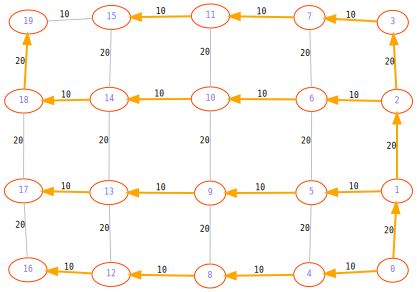

In [ ]:
path, cost = hallarRuta(G, 0)
print(path)
print(cost)
drawG_al(G, weighted=True, path=path)

In [ ]:
callesH = 29
callesV = 28
cuadras = (callesH - 1) * callesV + (callesV - 1) * callesH
print(cuadras)


1567


In [ ]:
callesH = 29
callesV = 28
ids = []
cont = 0

for i in range(callesH):
    tmp = []
    for j in range(callesV):
        tmp.append(cont)
        cont += 1
    ids.append(tmp)
matriz = []
cont = 0
for i in range(len(ids)):
    for j in range(len(ids[i])):
        vecinos = []
        id = ids[i][j]
        if id - callesV >= 0:
            vecinos.append((id - callesV, 10))
        if id + callesV < ids[callesH - 1][callesV - 1]:
            vecinos.append((id + callesV, 10))
        if id % callesV != 0 and (id + 1) % callesV != 0 or (id + 1) % callesV != 0 and id % callesV != 0:
            vecinos.append((id - 1, 10))
            vecinos.append((id + 1, 10))
        else:
            if id % callesV == 0:
                vecinos.append((id + 1, 10))
            elif (id + 1) % callesV == 0:
                vecinos.append((id - 1, 10))
        vecinos.sort()
        matriz.append(vecinos)

with open('grafo.al', mode='w') as file:
  for i in matriz:
    for j in i:
      file.write(str(str(j[0]) + ' ' + str(j[1]) + ' '))
    file.write('\n')


In [ ]:
G = []
with open("grafo.al") as f:
  for line in f:
    nums = [int(x) for x in line.split()]
    G.append([])
    for i in range(0, len(nums), 2):
      G[-1].append((nums[i], nums[i+1]))

for x in G:
  print(x)

In [ ]:
drawG_al(G, weighted=True)
#Se ve feo cuando tiene muchas cuadras

In [ ]:
for i in ids:
  print(i)